<h1> Checkpoint:</h1>

**Looking to see completetion and effort in completing the checkpoint. It's okay if it's not correct**

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import numpy, pandas, matplotlib, and seaborn

(Feel free to import other libraries!)

In [2]:
#General first step when setting up notebook, importing necessary libraries and tools into your file
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [3]:
#loading our dateset and showing the first five rows
df = pd.read_csv("states_edu.csv")
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. \ Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [4]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

In [5]:
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Predictor for Test: **<Math/Reading for 4/8 grade>**   (Ex. Math for 8th grade)

**(hit `Enter` to edit)**

Predictor Score in the questions refers to the predictor variable you chose here.

How many different years of data are in our dataset? Use a pandas function.

In [6]:
#To see how many different years of data are in our dataset,
#we can dive into the year column of our df, and use the function unique
#to print out an array of all the unique entries in that column
#because its an array, we can also use the len() function to return
#the total amount of different years, which will be 33
len(df.YEAR.unique())


33

Let's compare Michigan to Ohio. Which state has the higher average predictor score across all years?

In [7]:
#let's start by cleaning the data
df.dropna(subset=['AVG_MATH_4_SCORE'], inplace=True)
year = df.groupby("YEAR")
year[["AVG_MATH_4_SCORE", "STATE"]].agg({"AVG_MATH_4_SCORE":"mean"})

,AVG_MATH_4_SCORE
YEAR,
1990,213.000000
1992,218.418605
1996,224.000000
2000,223.976744
2003,234.000000
2005,237.169811
2007,239.207547
2009,239.547170
2011,240.490566


Find the average for your pedictor score across all states in 2019

In [29]:
df.groupby(['YEAR', 'AVG_MATH_4_SCORE', 'STATE']).mean()

ENROLL_ALL_EST  TOTAL_REVENUE  \
YEAR AVG_MATH_4_SCORE STATE                                                 
1990 213.0            NATIONAL                         NaN            NaN   
1992 193.0            DISTRICT_OF_COLUMBIA             NaN       709480.0   
     202.0            MISSISSIPPI                      NaN      1684706.0   
     204.0            LOUISIANA                        NaN      3341253.0   
     208.0            ALABAMA                          NaN      2678885.0   
...                                                    ...            ...   
2019 246.0            WYOMING                          NaN            NaN   
     247.0            MASSACHUSETTS                    NaN            NaN   
                      VIRGINIA                         NaN            NaN   
     248.0            MINNESOTA                        NaN            NaN   
     250.0            DODEA                            NaN            NaN   

                                            FEDERAL_REVENUE  STATE_REVENUE  \
YEAR AVG_MATH_4_SCORE STATE                                                  
1990 213.0            NATIONAL                          NaN            NaN   
1992 193.0            DISTRICT_OF_COLUMBIA          64749.0            0.0   
     202.0            MISSISSIPPI                  277706.0       901199.0   
     204.0            LOUISIANA                    367822.0      1848734.0   
     208.0            ALABAMA                      304177.0      1659028.0   
...                                                     ...            ...   
2019 246.0            WYOMING                           NaN            NaN   
     247.0            MASSACHUSETTS                     NaN            NaN   
                      VIRGINIA                          NaN            NaN   
     248.0            MINNESOTA                         NaN            NaN   
     250.0            DODEA                             NaN            NaN   

                                            LOCAL_REVENUE  TOTAL_EXPENDITURE  \
YEAR AVG_MATH_4_SCORE STATE                                                    
1990 213.0            NATIONAL                        NaN                NaN   
1992 193.0            DISTRICT_OF_COLUMBIA       644731.0           742893.0   
     202.0            MISSISSIPPI                505801.0          1691990.0   
     204.0            LOUISIANA                 1124697.0          3362853.0   
     208.0            ALABAMA                    715680.0          2653798.0   
...                                                   ...                ...   
2019 246.0            WYOMING                         NaN                NaN   
     247.0            MASSACHUSETTS                   NaN                NaN   
                      VIRGINIA                        NaN                NaN   
     248.0            MINNESOTA                       NaN                NaN   
     250.0            DODEA                           NaN                NaN   

                                            INSTRUCTION_EXPENDITURE  \
YEAR AVG_MATH_4_SCORE STATE                                           
1990 213.0            NATIONAL                                  NaN   
1992 193.0            DISTRICT_OF_COLUMBIA                 329160.0   
     202.0            MISSISSIPPI                          956104.0   
     204.0            LOUISIANA                           1888349.0   
     208.0            ALABAMA                             1481703.0   
...                                                             ...   
2019 246.0            WYOMING                                   NaN   
     247.0            MASSACHUSETTS                             NaN   
                      VIRGINIA                                  NaN   
     248.0            MINNESOTA                                 NaN   
     250.0            DODEA                                     NaN   

                                            SUPPORT_SERVICES_E

Find the maximum predictor score for every state. Hint: there's a function that allows you to do this easily

In [8]:
df[["STATE","AVG_MATH_4_SCORE"]].agg({"AVG_MATH_4_SCORE": "max"})

AVG_MATH_4_SCORE    253.0
dtype: float64

<h2> Feature Selection </h2>

After exploring the data, you now have to choose features that you would use to predict the performance of the students on a chosen test (your chosen predictor). By the way, you can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features

In [9]:
df['EXPENDITURE_PER_STUDENT'] = df['TOTAL_EXPENDITURE'] / df['ENROLL_ALL']

Final feature list: **<COMBINING FEATURES\>**

Feature selection justification: **<IN ORDER TO FIND THE EXPEDNETURE PER STUDENT WE MUST UTILIZE EXISTING VARIABLES\>**

<h2>Visualization</h2>

Use any graph you wish to see the relationship of your chosen predictor with any features you chose

**Visualization 1**

Text(0, 0.5, '4th grade math score')

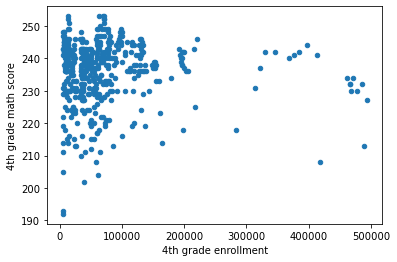

In [10]:
df.plot.scatter(x='ENROLL_4',y='AVG_MATH_4_SCORE')
plt.xlabel('4th grade enrollment')
plt.ylabel('4th grade math score')

**<SCATTER PLOT DEPICTING A RELATIVELY NEGATIVE RELATIONSHIP BETWEEN 4 GRADE ENROLLMENT AND FOURTH GRADE MATH SCORES/>**

**Visualization 2**

Text(0.5, 1.0, 'Distribution of 4th grade math scores')

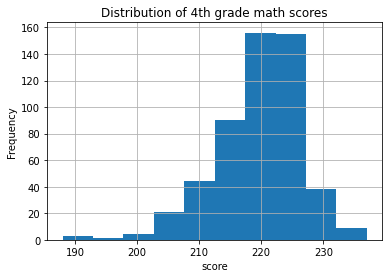

In [11]:
df.AVG_READING_4_SCORE.hist()
plt.xlabel('score')
plt.ylabel('Frequency')
plt.title('Distribution of 4th grade math scores')

**<Histogram representing the 4 grade math score. The Avg is around 220 score range/>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = df[['TOTAL_REVENUE','ENROLL_4','EXPENDITURE_PER_STUDENT','YEAR']].dropna()
y = df.loc[X.index]['AVG_MATH_4_SCORE']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size= .4, random_state=0)

<h2> Prediction </h2>

ML Models Resource: https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a

Chosen ML task: **<REGRESSION/TEST>**

In [15]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [16]:
# create your model here
model = LinearRegression()

In [17]:
model.fit(X_train, y_train)

LinearRegression()

In [18]:
y_pred = model.predict(X_test)

Text(0, 0.5, 'MATH 4 GRADE SCORES')

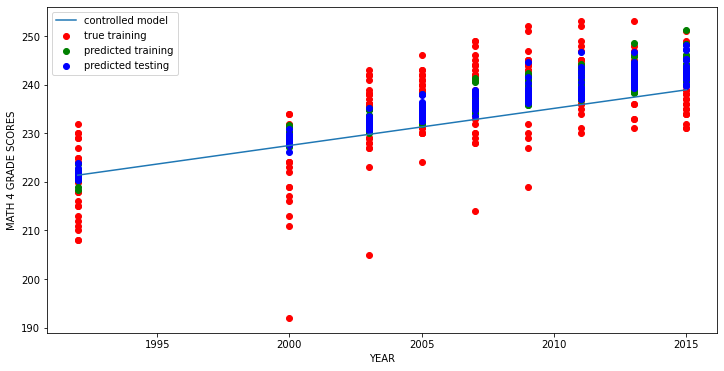

In [20]:
# FOR REGRESSION ONLY: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = 'YEAR'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel('MATH 4 GRADE SCORES')

<h2> Summary </h2>

**<As we can see based off our linear regression plot that over time there has been an increase in the performance of 4 grade math scores. Our true training reveals outliers between the years 2000-2010. Rather, our predicted testing and training hovers more closely around what our controlled regression line displays/>**